In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

from IPython import display
from textblob import TextBlob
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


%matplotlib inline
plt.style.use('fivethirtyeight')

In [81]:
with open("df_.pkl", 'rb') as picklefile: 
    df_ = pickle.load(picklefile)

In [82]:
df_ = df_[df_.handle != 'aaronblakewp']

In [83]:
cols=("µ_polarity","µ_subjectivity")

In [84]:
X = df_.drop('handle',axis=1).as_matrix()

In [85]:
X

array([[ 0.06407994,  0.24602321,  0.27063456,  0.31123528],
       [ 0.05566177,  0.27908113,  0.32734798,  0.33186996],
       [ 0.05751163,  0.24494013,  0.25526109,  0.31273347],
       ..., 
       [ 0.15238525,  0.27801635,  0.33403743,  0.30479303],
       [ 0.19883899,  0.25403883,  0.42002108,  0.30099314],
       [ 0.05192783,  0.21999006,  0.22248487,  0.29576803]])

In [87]:
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(X)

In [88]:
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1,
       1, 1,

In [16]:
with open("df_.pkl", 'rb') as picklefile: 
    df_ = pickle.load(picklefile)

In [91]:
df_['label']=kmeans.labels_

In [73]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [74]:
df_.query('label == 2')

,handle,µ_polarity,σ_polarity,µ_subjectivity,σ_subjectivity,label


In [58]:
print_full(df_.drop(['σ_polarity','σ_subjectivity'],axis=1).sort(['label','handle']))

              handle  µ_polarity  µ_subjectivity  label
1         AdamSerwer    0.055662        0.327348      0
4            BenHowe    0.047458        0.345468      0
5       DineshDSouza    0.087376        0.355134      0
6        DomenicoNPR    0.074821        0.323681      0
7            EliLake    0.074807        0.315131      0
9        ErinBurnett    0.114047        0.359580      0
10    HARRISFAULKNER    0.202435        0.353201      0
11     JRubinBlogger    0.022954        0.319500      0
13            JanCBS    0.129775        0.403929      0
14        JohnBerman    0.093555        0.300771      0
15          Jonahnro    0.091715        0.336921      0
17     KirstenPowers    0.084279        0.316333      0
18    KurtSchlichter    0.042015        0.324054      0
19       LarrySabato    0.121522        0.373500      0
20      MHarrisPerry    0.127545        0.322402      0
21   MarkSteynOnline    0.128816        0.311135      0
22         MattWelch    0.088459        0.324014

/Users/jeremy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [92]:
print(np.mean(df_.query('label == 0')['µ_polarity']),np.mean(df_.query('label == 1')['µ_polarity']),np.mean(df_.query('label == 2')['µ_polarity']))

0.08329491524194109 0.06920036098119851 0.14999511229093299


In [93]:
print(np.mean(df_.query('label == 0')['µ_subjectivity']),np.mean(df_.query('label == 1')['µ_subjectivity']),np.mean(df_.query('label == 2')['µ_subjectivity']))

0.3316171215526253 0.2814882834404953 0.35657590125975


In [94]:
print(np.mean(df_.query('label == 0')['σ_polarity']),np.mean(df_.query('label == 1')['σ_polarity']),np.mean(df_.query('label == 2')['σ_polarity']))

0.28153022070293937 0.24858306168751962 0.2985884738544155


In [95]:
print(np.mean(df_.query('label == 0')['σ_subjectivity']),np.mean(df_.query('label == 1')['σ_subjectivity']),np.mean(df_.query('label == 2')['σ_subjectivity']))

0.3272366390378896 0.31359624285453824 0.3264486682321504


For n_clusters = 2 The average silhouette_score is : 0.321303885368


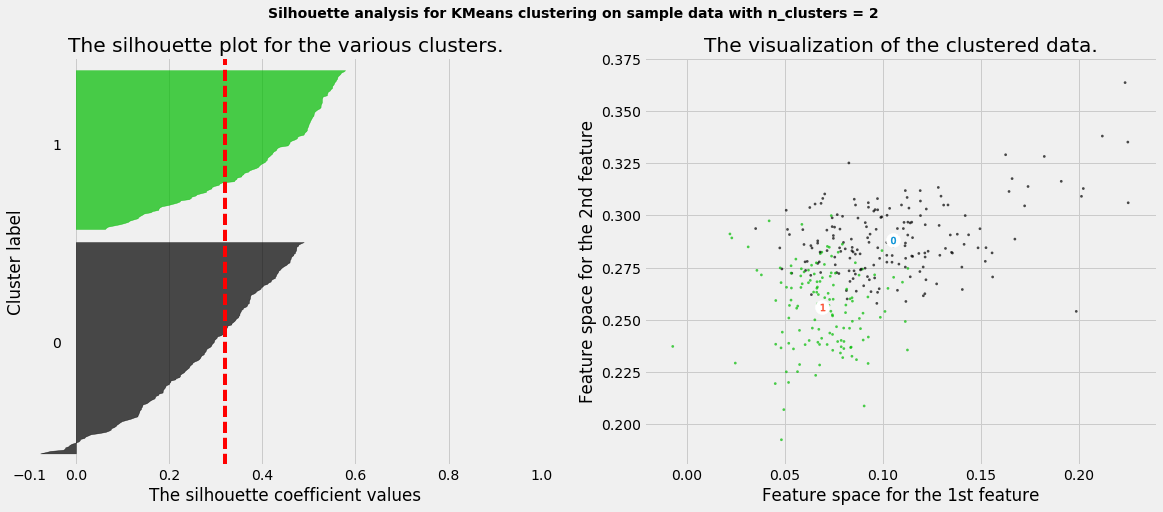

For n_clusters = 3 The average silhouette_score is : 0.336357395943


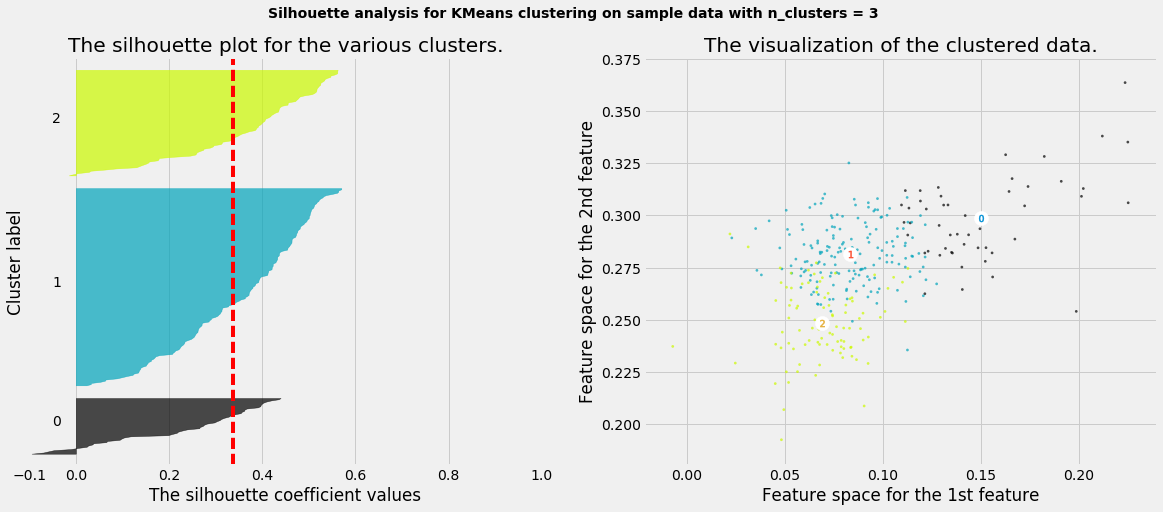

For n_clusters = 4 The average silhouette_score is : 0.30306362399


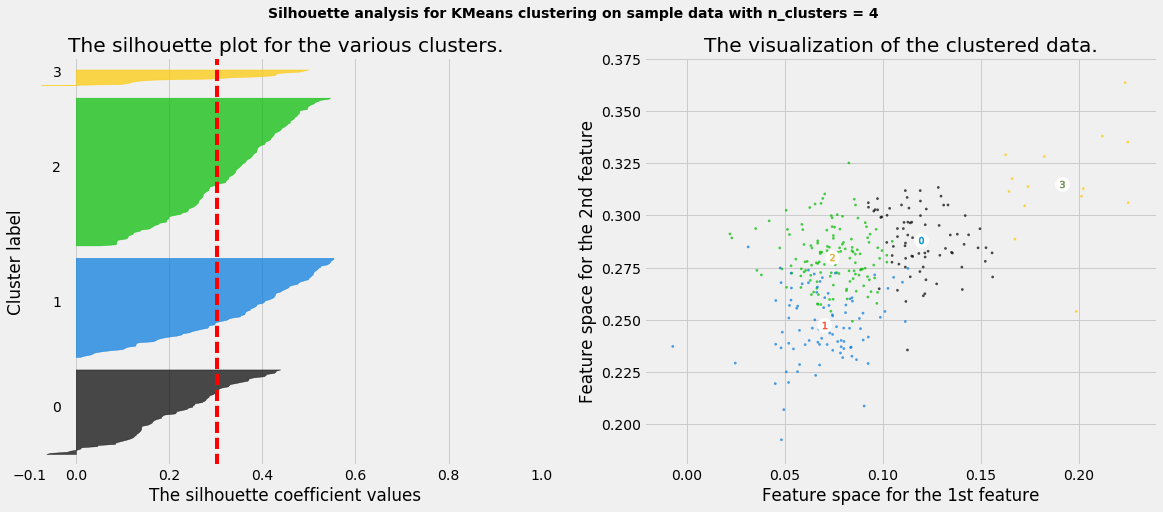

For n_clusters = 5 The average silhouette_score is : 0.280541014834


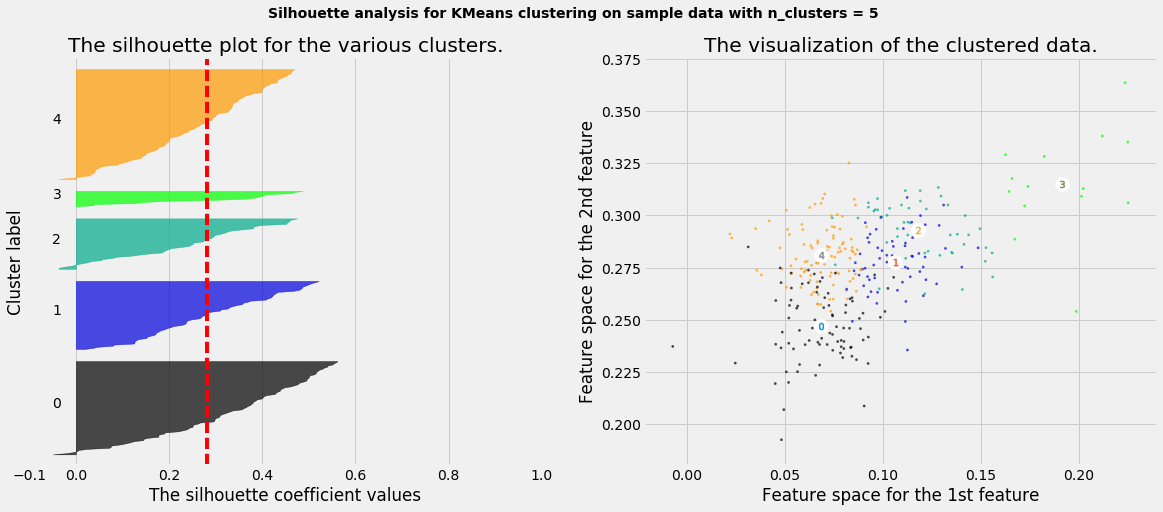

For n_clusters = 6 The average silhouette_score is : 0.261362199406


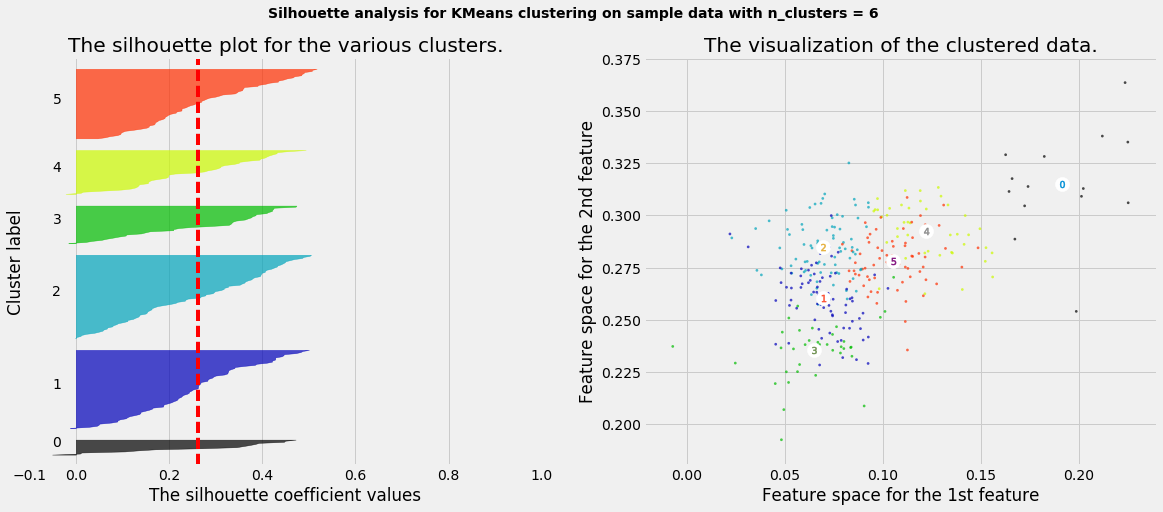

In [86]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [8]:
data = df_.drop('handle',axis=1).as_matrix()

/Users/jeremy/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


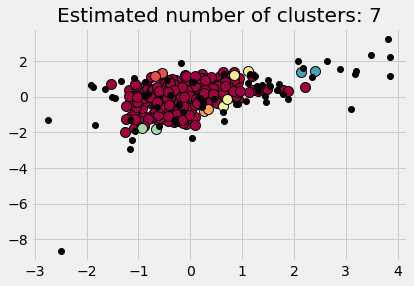

In [52]:
X = StandardScaler().fit_transform(data)
db = DBSCAN(eps=.5, min_samples=2).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)